In [1]:
require(ggplot2)
library(cowplot)

Loading required package: ggplot2

Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



List of 1
 $ aspect.ratio: num 1.78
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

png 
  2

[1] 3718704


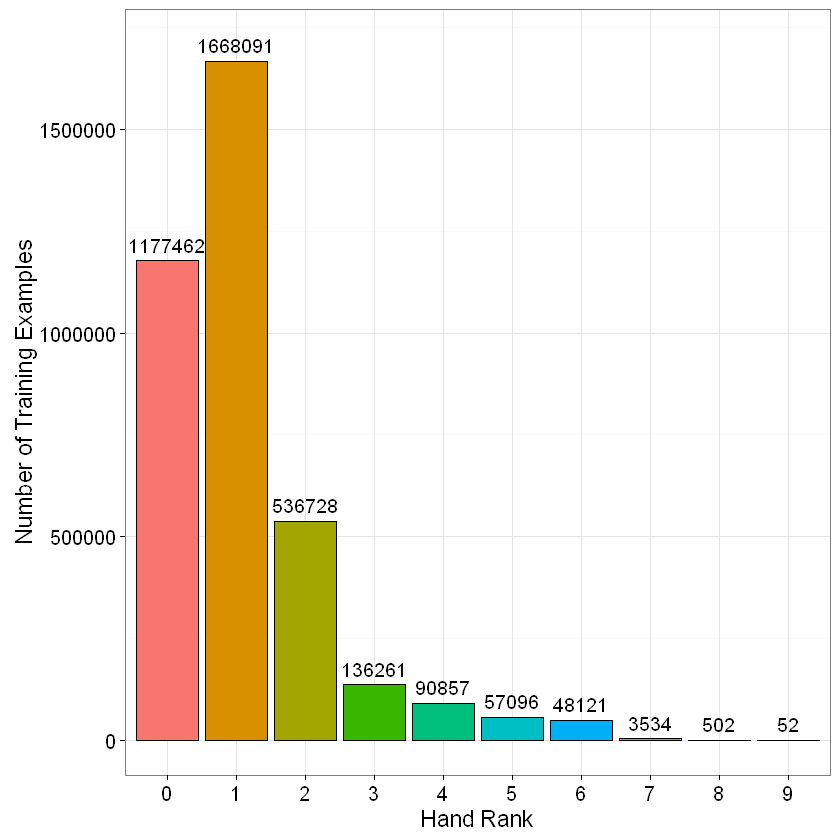

In [23]:
theme(aspect.ratio=16/9)
train_y <- c(0:9)
train_y_values <- c(1177462,1668091,536728,136261,90857,57096,48121,3534,502,52)
train <- data.frame(train_y,train_y_values)
p<-ggplot(train,aes(factor(train_y), train_y_values,fill=factor(train_y))) + geom_bar(colour="black", stat="identity", show.legend=FALSE)
#p<-p+guides(colour = guide_legend(override.aes = factor(train_y)))
p<-p+geom_text(aes(label = train_y_values, y = (train_y_values+40000)), size = 4) + theme_bw()
p<-p + labs(
    x = "Hand Rank",
    y = "Number of Training Examples") + theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14))
#p<-p+guides(guide=guide_legend(ncol = 2,reverse = TRUE))
p
pdf(file="training_var.pdf", width=8, height=4.5)
p
dev.off()
print(sum(train_y_values))

png 
  2

[1] 929675


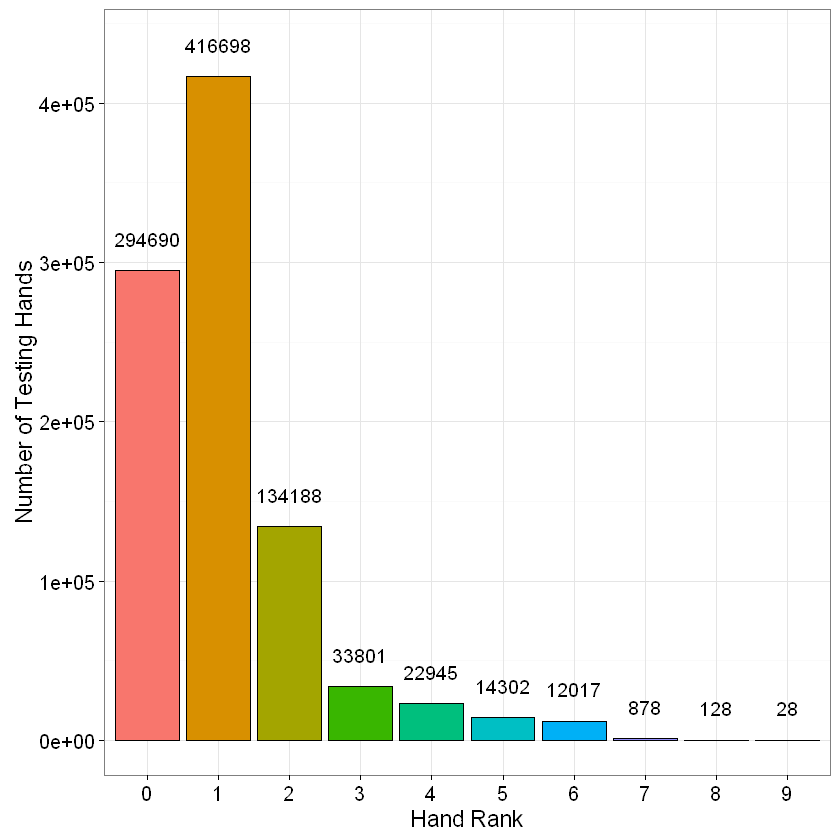

In [24]:
test_y <- c(0:9)
test_y_values <- c(294690,416698,134188,33801,22945,14302,12017,878,128,28 )
test <- data.frame(test_y,test_y_values)
p<-ggplot(train,aes(factor(test_y), test_y_values,fill=factor(test_y))) + geom_bar(colour="black", stat="identity", show.legend=FALSE)
#p<-p+guides(colour = guide_legend(override.aes = factor(train_y)))
p<-p+geom_text(aes(label = test_y_values, y = (test_y_values+20000)), size = 4) + theme_bw()
p<-p + labs(
    x = "Hand Rank",
    y = "Number of Testing Hands") + theme(axis.text=element_text(size=12),
        axis.title=element_text(size=14))
#p<-p+guides(guide=guide_legend(ncol = 2,reverse = TRUE))
p
pdf(file="testing_var.pdf", width=8, height=4.5)
p
dev.off()


In [27]:
print(sum(train_y_values))
print(sum(test_y_values))

[1] 3718704
[1] 929675


pdf 
  2

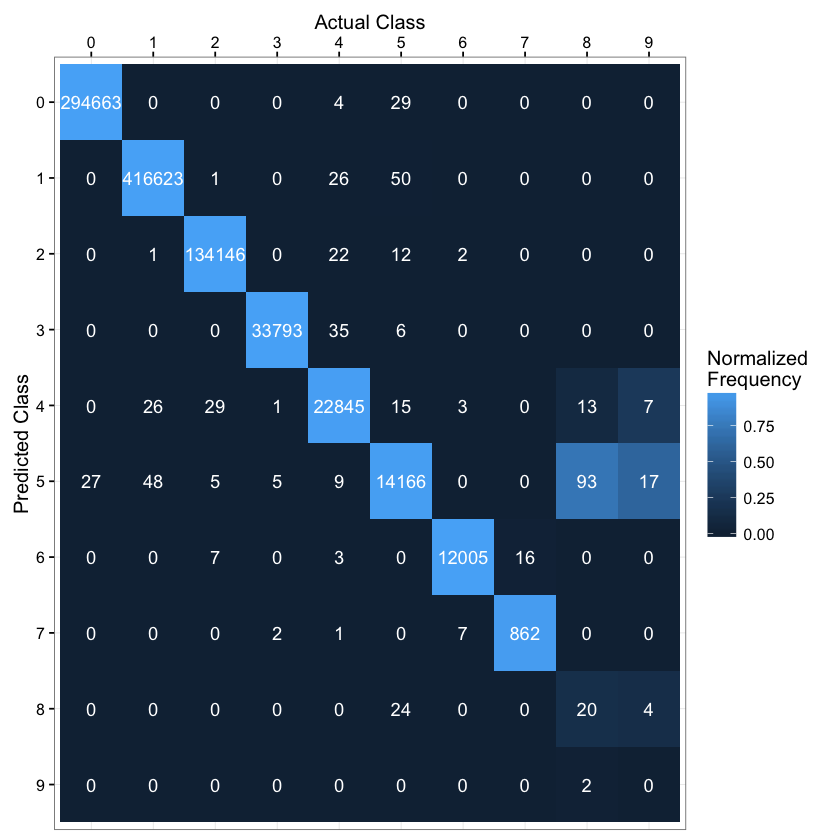

In [7]:
input <- read.table("conf_matrix.csv", row.names=1, header=TRUE, sep=",")
input.matrix <- data.matrix(input)


normvals<-colSums(input.matrix)
norm.matrix<- input.matrix %*% diag(1/normvals) 


colnames(norm.matrix) <- c("5", "1", "0", "2", "4", "8", "9", "3", "6", "7")
rownames(norm.matrix) <- colnames(norm.matrix)

colnames(input.matrix) <- colnames(norm.matrix)
rownames(input.matrix) <- colnames(norm.matrix)

norm.matrix <- norm.matrix[,c(3,2,4,8,5,1,9,10,6,7)]
norm.matrix <- norm.matrix[c(7,6,10,9,1,5,8,4,2,3),]
input.matrix <- input.matrix[,c(3,2,4,8,5,1,9,10,6,7)]
input.matrix <- input.matrix[c(7,6,10,9,1,5,8,4,2,3),]


confusion <- as.data.frame(as.table(norm.matrix))
confusion.numbers <- as.data.frame(as.table(input.matrix))
conf <- merge(x = confusion, y = confusion.numbers, by = c('Var1','Var2'))


p1 <- ggplot(conf) +theme_bw() +  geom_tile(aes(x=Var2, y=Var1, fill=Freq.x)) + scale_x_discrete(name="Actual Class") + scale_y_discrete(name="Predicted Class") + labs(fill="Normalized\nFrequency")+ geom_text(aes(x=Var2, y=Var1,label=Freq.y),colour="white",show.legend=FALSE,inherit.aes=FALSE)
ggdraw(switch_axis_position(p1,axis='x'))

pdf(file="confmatrix.pdf", width=7, height=5)
ggdraw(switch_axis_position(p1,axis='x'))
dev.off()



In [3]:
#Visualize the training progress:
train_list <- read.table("training_accuracy.csv", header=FALSE, sep=",")
head(train_list)

V1,V2
1,0.4480920
2,0.4485667
3,0.4485667
4,0.4485667
5,0.4485667
6,0.4485667


pdf 
  2

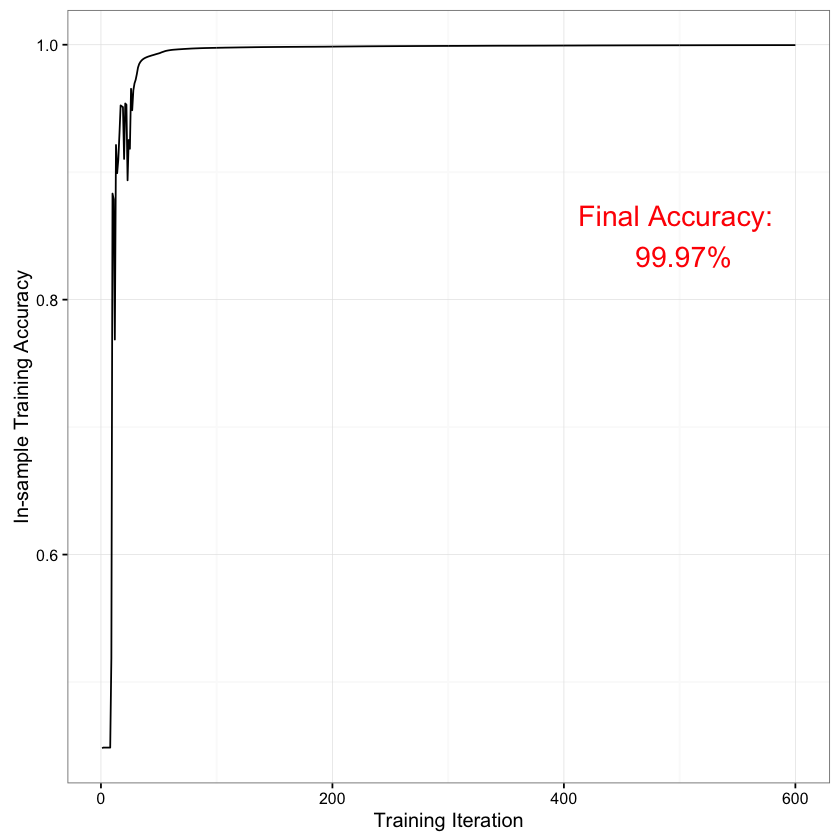

In [5]:
p1 <- ggplot(train_list) +theme_bw() +  geom_line(aes(x=V1, y=V2)) + labs(
    x = "Training Iteration",
    y = "In-sample Training Accuracy") + annotate("text", label = "Final Accuracy: \n 99.97%", x = 500, y = .85, size = 6, colour = "red")
p1
pdf(file="training_plot.pdf", width=5, height=3)
p1
dev.off()